# SALES DATA ANALYSIS

# 1. DATA UNDERSTANDING

In [1]:
# Required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sales=pd.read_excel("ECOMM DATA.xlsx") # Read the dataset

In [3]:
sales.head() # First 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
sales.tail() # Last 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


In [5]:
sales.shape # Shape of dataset

(51290, 24)

In [6]:
sales.columns # Columns in the dataset

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
sales.info() # Data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
sales.describe() # Statistical info of dataset

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810



# 2. DATA CLEANING

In [9]:
sales.isnull().sum() # Null values in dataset

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

The Postal Code column contains 41296 null values. We can remove the column as it doesn't align with the goals of our project and won't impact our insights.

In [10]:
sales.drop(['Postal Code'],axis=1,inplace=True) # Removing the column
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [11]:
sales.duplicated().sum()

0

No duplicate values are present in the dataset.

In [12]:
# Extracting Year and Month from Order Date
sales["Order Year"] = sales["Order Date"].dt.year
sales["Order Month"] = sales["Order Date"].dt.month

In [13]:
sales.shape

(51290, 25)

After data cleaning there are 51290 rows and 25 remaining columns.

# 3. EXPLORATORY DATA ANALYSIS

<ipython-input-14-36be3b9ec913>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Quantity', data=quantity_per_year, palette='pastel')


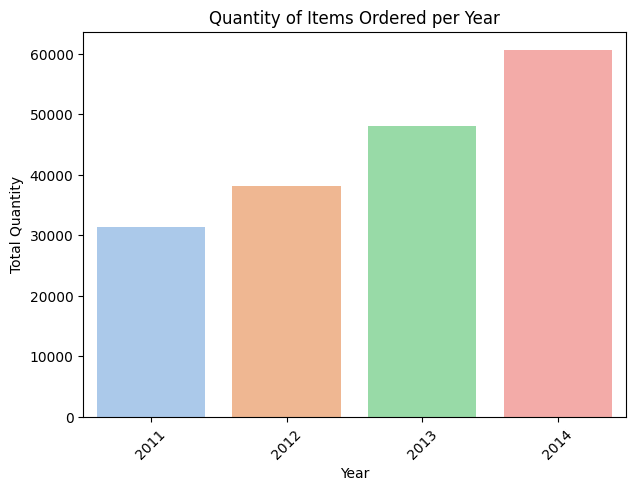

In [14]:
# Relationship between Quantity Ordered per Year

quantity_per_year = sales.groupby('Order Year')['Quantity'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Order Year', y='Quantity', data=quantity_per_year, palette='pastel')
plt.title('Quantity of Items Ordered per Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

1. Highest no. of items were ordered in 2014.
2. Least no. of items were ordered in 2011.
3. Every year there is a increase in no. of items ordered.
4. The no. of items ordered in 2014 is twice the items ordered in 2011.


<ipython-input-15-8bb03a6b9ab0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Sales', data=sales_per_year, palette='pastel')


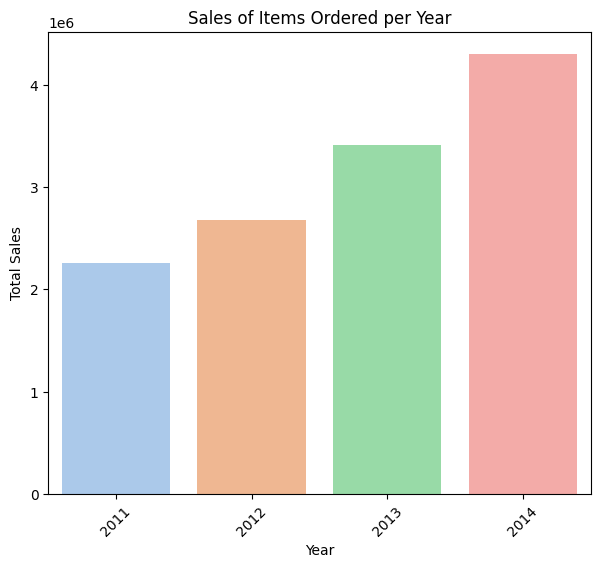

In [15]:
# Total Sales per Year

sales_per_year = sales.groupby('Order Year')['Sales'].sum().reset_index()
plt.figure(figsize=(7, 6))
sns.barplot(x='Order Year', y='Sales', data=sales_per_year, palette='pastel')
plt.title('Sales of Items Ordered per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

1. There is a 100% growth in sales from 2011 to 2014.
2. The sales doubled from 2011 to 2014.

<ipython-input-16-6c4b2293b75a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales, x='Market', y='Sales',palette='pastel')


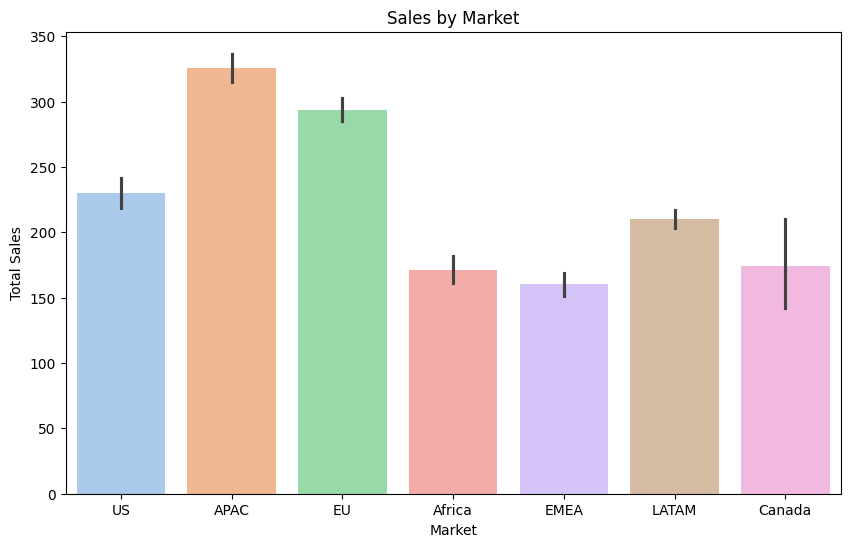

In [16]:
# Sales By Market

plt.figure(figsize=(10,6))
sns.barplot(data=sales, x='Market', y='Sales',palette='pastel')
plt.title('Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.show()

1. The Asia-Pacific(APAC) region has the highest market.
2. The Africa and Canada region has almost the same level of market.
3. The EMEA region has the lowest market.

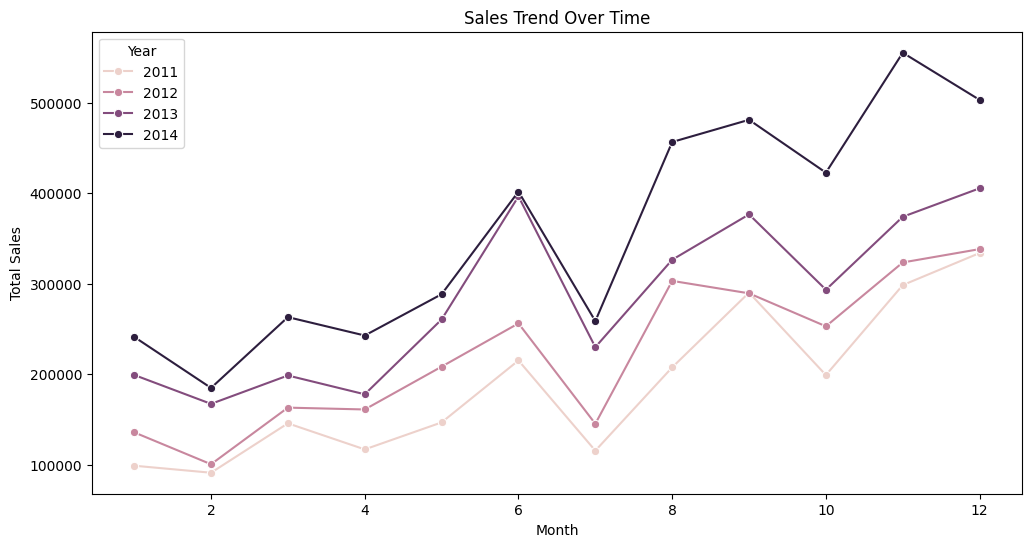

In [17]:
# Sales Trend Over Time

sales_by_month_year = sales.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_month_year, x='Order Month', y='Sales', hue='Order Year', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

1. There is a seasonal effect on sales.
2. Every year in the second quarter of year the sales has a huge decrease.
3. The last quarter of the year has the highest growth in sales.


Top 10 Best-Selling Products:
Product Name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: Quantity, dtype: int64


<ipython-input-18-fce8a873d445>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_selling_products.index, y=best_selling_products.values, palette='Set2')


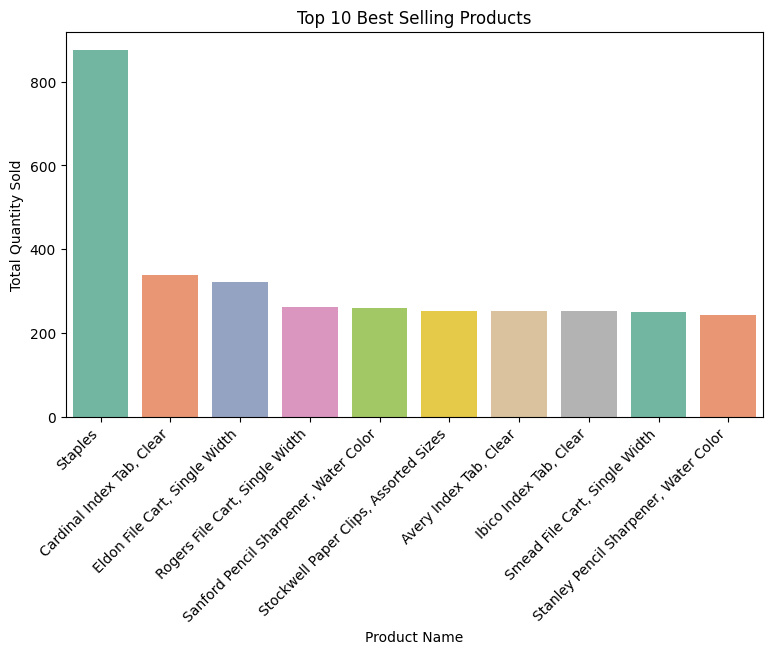

In [18]:
# Top 10 Best Selling Products

best_selling_products = sales.groupby('Product Name')['Quantity'].sum().nlargest(10)
print("\nTop 10 Best-Selling Products:")
print(best_selling_products)

plt.figure(figsize=(9, 5))
sns.barplot(x=best_selling_products.index, y=best_selling_products.values, palette='Set2')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

1. Staples is the top selling product with 876 quantity.
2. Staples holds significant demand and popularity among consumers.
3. Stanley Pencil Sharpener, Water Color is the lowest selling product with 242 quantity.
4. The rest of the products exhibit a moderate sales rate.

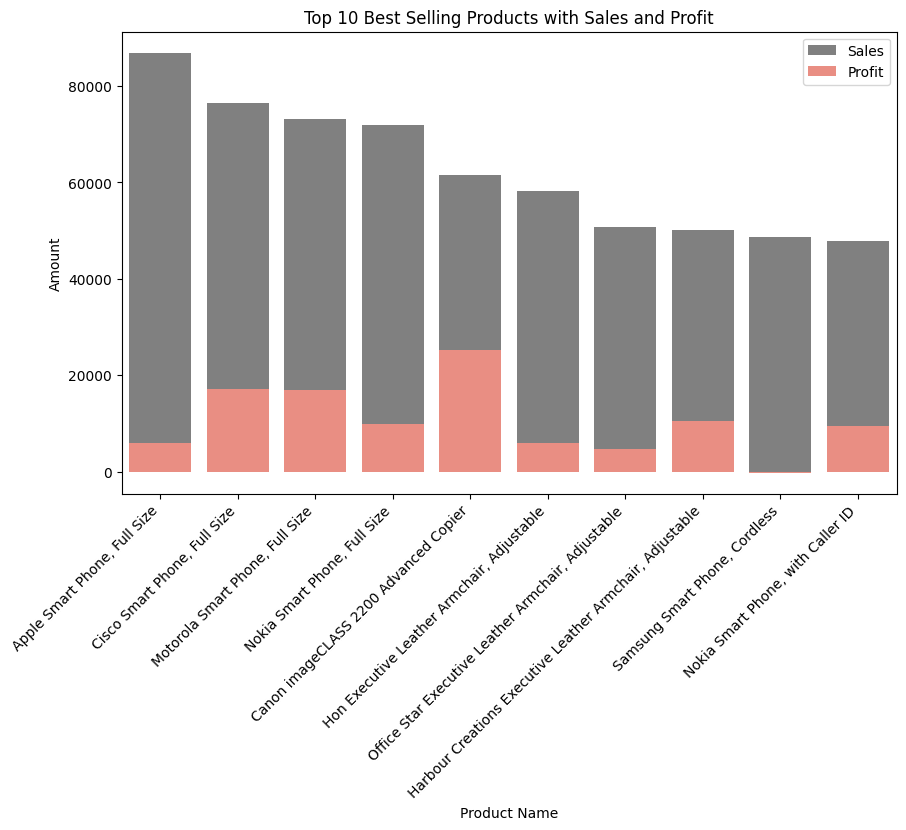

In [19]:
# Top 10 Best Selling Product According to Sales and Profit

product_sales_profit = sales.groupby('Product Name')[['Sales', 'Profit']].sum()
top_10_products = product_sales_profit.nlargest(10, 'Sales')
top_10_products = top_10_products.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Sales', data=top_10_products, color='grey', label='Sales')
sns.barplot(x='Product Name', y='Profit', data=top_10_products, color='salmon', label='Profit')
plt.title('Top 10 Best Selling Products with Sales and Profit')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

1. The product with the highest profit margin is the Canon imageCLASS 2200 Advanced Copier.
2. The product with the least profit margin is the Samsung Smart Phone, Cordless.

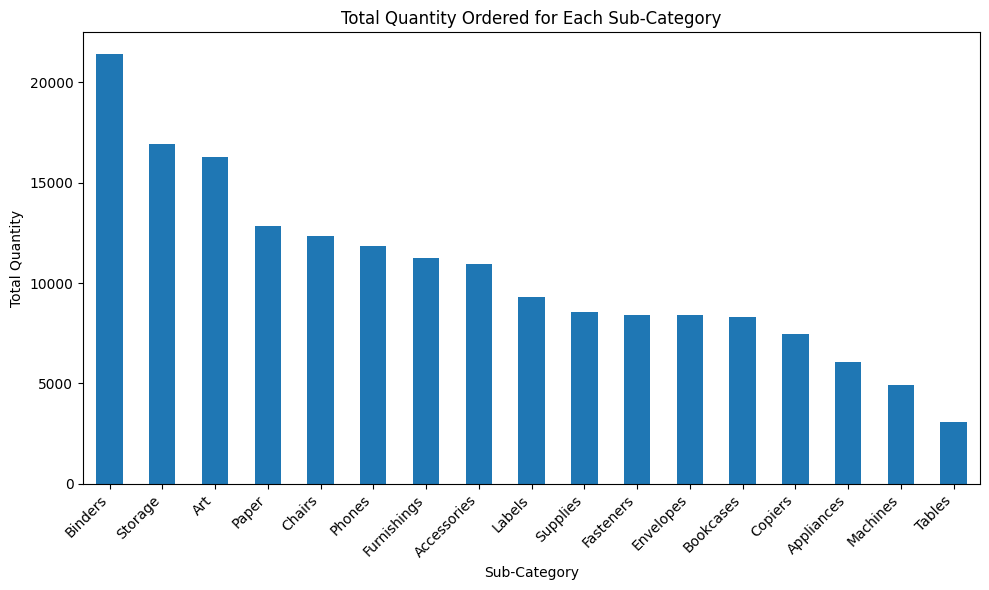

In [20]:
# Total Quantity Ordered for Each Sub-Category

subcat_quantity = sales.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
subcat_quantity.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Ordered for Each Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. The subcategory 'Binders' accounts for the highest quantity ordered among all subcategories.
2. The subcategory 'Tables' accounts for the lowest quantity ordered among all subcategories

<ipython-input-21-200ed0424f20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=subcat_sales,palette='Set2')


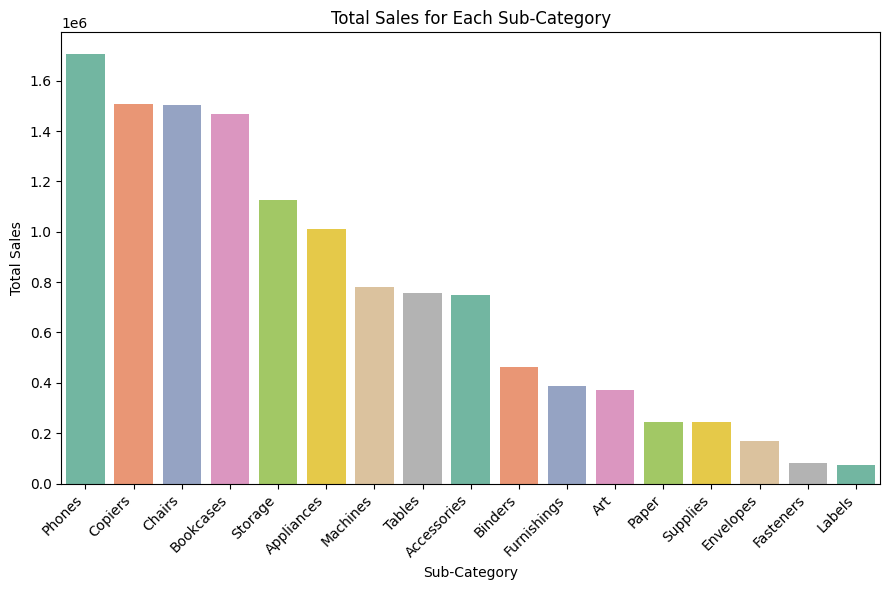

In [21]:
# Total Sales for Each Sub-Category

subcat_sales = sales.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(9, 6))
sns.barplot(x='Sub-Category', y='Sales', data=subcat_sales,palette='Set2')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. The subcategory 'Phones' has the highest sales.
2. The subcategory 'Labels' has the least sales.
3. The subcategories 'Copiers' and 'Chairs' have nearly identical sales figures.

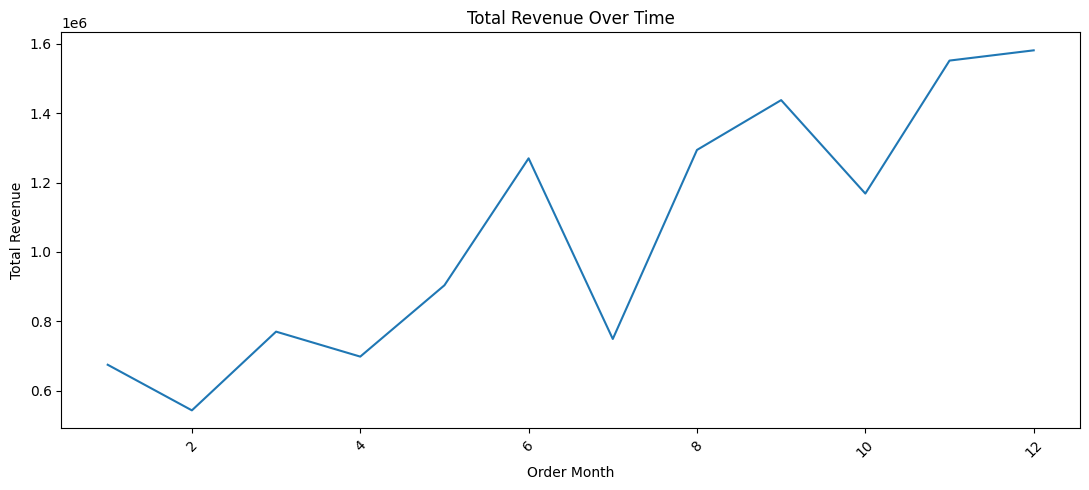

In [22]:
# Total Revenue over Time (Over month)

revenue_over_time = sales.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(11, 5))
revenue_over_time.plot(kind='line')
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Revenue starts low, dips mid-year, then sharply rises towards the end, likely due to seasonal trends.

<ipython-input-23-acfc19b53319>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=revenue_by_category, palette='pastel')


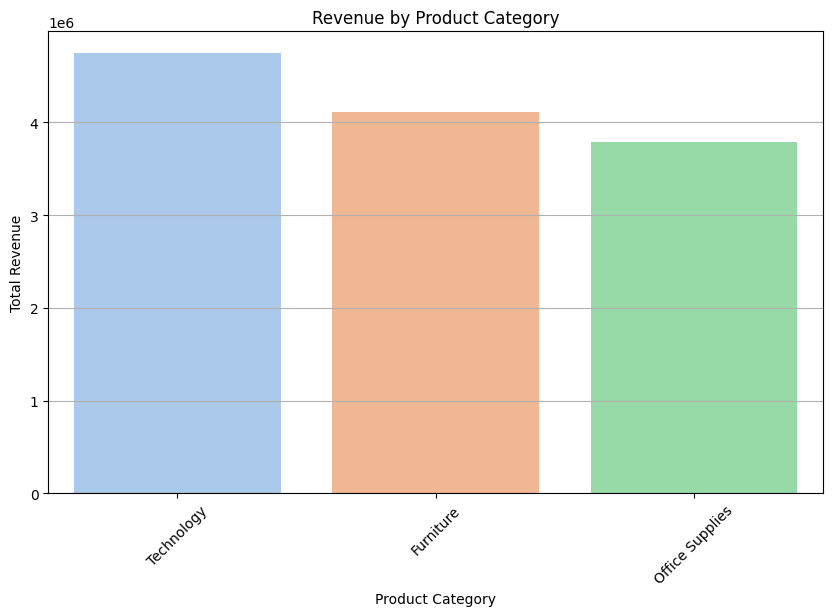

In [23]:
# Revenue By Category

revenue_by_category = sales.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=revenue_by_category, palette='pastel')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

1. "Technology" emerges as the product category with the highest revenue.
2. "Office supplies" registers as the product category with the lowest revenue.
3. "Office supplies" revenue slightly trails behind furniture revenue.

<ipython-input-24-41cecb701cfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=revenue_by_region, palette='Set2')


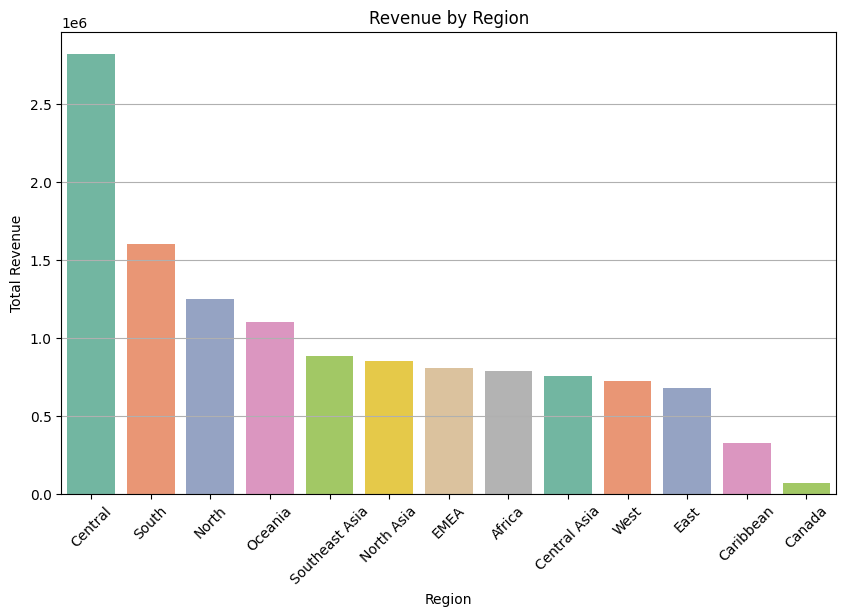

In [24]:
# Revenue By Region

revenue_by_region = sales.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=revenue_by_region, palette='Set2')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

1. The Central region leads in terms of revenue generation.
2. The Canada region shows the lowest revenue figures.